# Machine Learning in Python - Project 2

Due Friday, April 15th by 5 pm UK local time.  

Contributors:
* Xiangtian Duan (s2248742)
* Jihong(Candice) Ma (s2242121)
* Yanren Mao (s2207399)
* Qingrui Mu (s2189295)

## 0. Setup

In [1]:
# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import ppscore as pps
import warnings

# pip install plotly==5.7.0
import plotly.express as px

In [2]:
# Load data
d = pd.read_csv("hotel.csv")
data = d.copy()

## 1. Introduction

**Backgroud**  
In the lodging industry, the rate of room reservation cancellations has been increasing year after year, resulting in a decline in revenues. When a guest cancels a room without adequate notice, the hotel incurs additional costs to resell the room as vacant. In addition, if the room cannot be rented, the hotel loses revenue. Thus, reservation cancellations are arguably one of the biggest headaches for any revenue manager or hotel manager today. However, thanks to data science and machine learning, there is a lot that can be done to accurately predict that an individual specific reservation will be cancelled. 


**Overview**  
In this project, our goal is to build a classification model able to predict whether or not a booking will be canceled with the highest accuracy possible.  In order to do so, we used data collected by Antonio, Almeida and Nunes, 2019 on hotel bookings. The dataset provides data come from the booking systems of two real hotels and reflect bookings made between July 1st, 2015 through August 31st 2017. This is a large dataset with 119,390 observations. The exploratory analysis includes an analysis of the relationship between the cancelled variable and other characteristics. Data visualization tools were used to identify trends and valuable insights from those analyses. Prior to training the classification model, a clustering model was implemented to help identify the four caster segments whose profiles were analyzed. Various models were considered, and finally it was decided to use logistic regression. We evaluated the model and drew conclusions and recommendations to optimize occupancy, improve operations, and increase revenue for the hotel.


## 2. Exploratory Data Analysis and Feature Engineering

### 2.1  Data Inspection

In [9]:
data.head()

is_canceled         hotel  lead_time  arrival_date_year arrival_date_month  \
0            0  Resort Hotel        342               2015               July   
1            0  Resort Hotel        737               2015               July   
2            0  Resort Hotel          7               2015               July   
3            0  Resort Hotel         13               2015               July   
4            0  Resort Hotel         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   assigned_room_type  booking_changes deposit_type  agent company  \
0                   C                3   No Deposit    NaN     NaN   
1                   C                4   No Deposit    NaN     NaN   
2                   C                0   No Deposit    NaN     NaN   
3                   A                0   No Deposit  304.0     NaN   
4                   A                0   No Deposit  240.0     NaN   

  days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
0                    0      Transient   0.0                            0   
1                    0      Transient   0.0                            0   
2                    0      Transient  75.0                            0   
3                    0      Transient  75.0                            0   
4                    0      Transient  98.0                            0   

  total_of_special_requests  
0                         0  
1                         0  
2                         0  
3                         0  
4                         1  

[5 rows x 30 columns]

In [10]:
# Numerical variables
data.describe().T

count         mean         std      min  \
is_canceled                     119390.0     0.370416    0.482918     0.00   
lead_time                       119390.0   104.011416  106.863097     0.00   
arrival_date_year               119390.0  2016.156554    0.707476  2015.00   
arrival_date_week_number        119390.0    27.165173   13.605138     1.00   
arrival_date_day_of_month       119390.0    15.798241    8.780829     1.00   
stays_in_weekend_nights         119390.0     0.927599    0.998613     0.00   
stays_in_week_nights            119390.0     2.500302    1.908286     0.00   
adults                          119390.0     1.856403    0.579261     0.00   
children                        119386.0     0.103890    0.398561     0.00   
babies                          119390.0     0.007949    0.097436     0.00   
is_repeated_guest               119390.0     0.031912    0.175767     0.00   
previous_cancellations          119390.0     0.087118    0.844336     0.00   
previous_bookings_not_canceled  119390.0     0.137097    1.497437     0.00   
booking_changes                 119390.0     0.221124    0.652306     0.00   
agent                           103050.0    86.693382  110.774548     1.00   
company                           6797.0   189.266735  131.655015     6.00   
days_in_waiting_list            119390.0     2.321149   17.594721     0.00   
adr                             119390.0   101.831122   50.535790    -6.38   
required_car_parking_spaces     119390.0     0.062518    0.245291     0.00   
total_of_special_requests       119390.0     0.571363    0.792798     0.00   

                                    25%       50%     75%     max  
is_canceled                        0.00     0.000     1.0     1.0  
lead_time                         18.00    69.000   160.0   737.0  
arrival_date_year               2016.00  2016.000  2017.0  2017.0  
arrival_date_week_number          16.00    28.000    38.0    53.0  
arrival_date_day_of_month          8.00    16.000    23.0    31.0  
stays_in_weekend_nights            0.00     1.000     2.0    19.0  
stays_in_week_nights               1.00     2.000     3.0    50.0  
adults                             2.00     2.000     2.0    55.0  
children                           0.00     0.000     0.0    10.0  
babies                             0.00     0.000     0.0    10.0  
is_repeated_guest                  0.00     0.000     0.0     1.0  
previous_cancellations             0.00     0.000     0.0    26.0  
previous_bookings_not_canceled     0.00     0.000     0.0    72.0  
booking_changes                    0.00     0.000     0.0    21.0  
agent                              9.00    14.000   229.0   535.0  
company                           62.00   179.000   270.0   543.0  
days_in_waiting_list               0.00     0.000     0.0   391.0  
adr                               69.29    94.575   126.0  5400.0  
required_car_parking_spaces        0.00     0.000     0.0     8.0  
total_of_special_requests          0.00     0.000     1.0     5.0

In [11]:
# Categorical variables
data.describe(include = 'object').T

count unique         top    freq
hotel                 119390      2  City Hotel   79330
arrival_date_month    119390     12      August   13877
meal                  119390      5          BB   92310
country               118902    177         PRT   48590
market_segment        119390      8   Online TA   56477
distribution_channel  119390      5       TA/TO   97870
reserved_room_type    119390     10           A   85994
assigned_room_type    119390     12           A   74053
deposit_type          119390      3  No Deposit  104641
customer_type         119390      4   Transient   89613

### 2.2. Data Cleaning

Firstly, we check if there are missing data.

In [12]:
# check for missing values
data.isnull().sum()

is_canceled                            0
hotel                                  0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

 Missing data replacing rules:
* `children`: If the number of children is not given, most probably 0.
* `agent`: If no agency is given, booking was most likely made without one.
* `company`: If none given, it was most likely private.  

Note that there exist entries with no guests in our data, which should be deleted.

In [3]:
# Reference: https://www.kaggle.com/code/marcuswingen?scriptVersionId=29742476&cellId=6

nan_replacements = {"children": 0, "country": "Unknown", "agent": 0, "company": 0}
data = data.fillna(nan_replacements)

# "meal" contains values "Undefined", which is equal to SC.
data["meal"].replace("Undefined", "SC", inplace=True)

# Some rows contain entreis with 0 adults, 0 children and 0 babies. 
# Dropping these entries with no guests.
zero_guests = list(data.loc[data["adults"]
                   + data["children"]
                   + data["babies"]==0].index)
data.drop(data.index[zero_guests], inplace=True)

In [14]:
# Drop Duplicate entries 
data.drop_duplicates(inplace= False)

is_canceled         hotel  lead_time  arrival_date_year  \
0                 0  Resort Hotel        342               2015   
1                 0  Resort Hotel        737               2015   
2                 0  Resort Hotel          7               2015   
3                 0  Resort Hotel         13               2015   
4                 0  Resort Hotel         14               2015   
...             ...           ...        ...                ...   
119385            0    City Hotel         23               2017   
119386            0    City Hotel        102               2017   
119387            0    City Hotel         34               2017   
119388            0    City Hotel        109               2017   
119389            0    City Hotel        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  assigned_room_type  \
0                          0       2  ...                   C   
1                          0       2  ...                   C   
2                          1       1  ...                   C   
3                          1       1  ...                   A   
4                          2       2  ...                   A   
...                      ...     ...  ...                 ...   
119385                     5       2  ...                   A   
119386                     5       3  ...                   E   
119387                     5       2  ...                   D   
119388                     5       2  ...                   A   
119389                     7       2  ...                   A   

        booking_changes deposit_type  agent company days_in_waiting_list  \
0                     3   No Deposit    0.0     0.0                    0   
1                     4   No Deposit    0.0     0.0                    0   
2                     0   No Deposit    0.0     0.0                    0   
3                     0   No Deposit  304.0     0.0                    0   
4                     0   No Deposit  240.0     0.0                    0   
...                 ...          ...    ...     ...                  ...   
119385                0   No Deposit  394.0     0.0                    0   
119386                0   No Deposit    9.0     0.0                    0   
119387                0   No Deposit    9.0     0.0                    0   
119388                0   No Deposit   89.0     0.0                    0   
119389                0   No Deposit    9.0     0.0                    0   

        customer_type     adr  required_car_parking_spaces  \
0           Transient    0.00            

We also check duplicates in our dataset. However, since it is possible that multiple bookings with the same features were made on the same day, we cannot say for sure that those are true duplicates which makes deleting those "duplicates" questionable. Therefore, we will keep thses "duplicates".

In [15]:
# We have deleted 280 rows data with no guests.
data.shape

(119210, 30)

### 2.3  Exploratory Data Analysis

#### 2.3.1 Cancellation Rate

In this part, `is_canceled` is the variable of our interest. Firstly, we would like to see the proportion of cancellation of the total reservation.


([<matplotlib.axis.XTick at 0x29be2a98fd0>,
 [Text(0, 0, 'Not Canceled'), Text(0, 0, 'Canceled')])

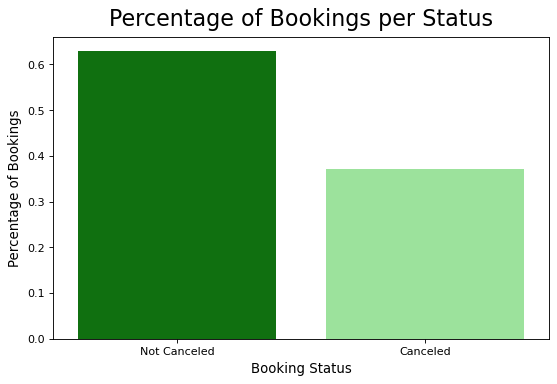

In [4]:
# Visualizing the percentage of canceled vs not canceled bookings: 
plt.figure(figsize=(8,5)) 
plt.title("Percentage of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=data['is_canceled'].unique(), y=data['is_canceled'].value_counts(normalize=True), palette=['green', 'lightgreen'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])

From the plot above, about 40% of the reservation would be canceled, which is not low. Therefore, the study of the factors that lead to the cancellation is meaningful.

In the following parts, we divided variables to the categorical variables and the numerical variables, and studied their correlation with cancellation status separately.

#### 2.3.2 Categorical Features

We select categorical variables `hotel`, `country`, `market_segment`, `reserved_room_type`,` assigned_room_type`, and `deposit_type` to study their correlation betwwen cancellation status.  

Firstly, we plot the distribution of the reservation status by two hotels which are Resort Hotel and City Hotel.

In [5]:
data_cr_agg = data.groupby(["hotel"])["is_canceled"].agg(["value_counts"])
data_cr_agg

value_counts
hotel        is_canceled              
City Hotel   0                   46084
             1                   33079
Resort Hotel 0                   28927
             1                   11120

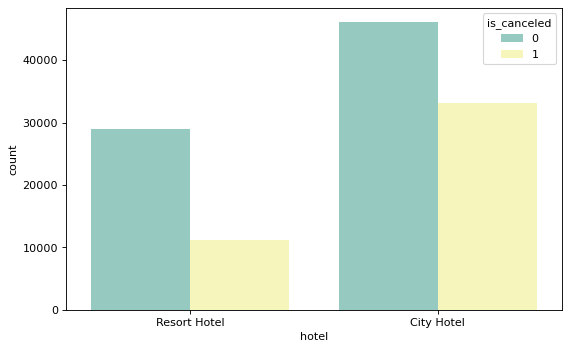

In [19]:
sns.countplot(x = "hotel", hue = "is_canceled", data = data, palette="Set3")

From the plot above, it is easy to conclude that in general, the number of reservations which are not cancelled is higher than the number of reservations which are cancelled. This is the case for both hotels(City Hotel and Resort Hotel) and for the total number of reservations.

Considering the proportion of cancellation for both hotels, it is obvious that City Hotel has the higher proportion of cancellation, along with its higher reservation. Thus, we conclude that people tend to select the City Hotel. However, there is a high probability that they will cancel their booking on City Hotel. At the same time, less people would select the Resort Hotel. However, once they have selected the Resort Hotel, they are less likely to cancel their reservation.   

Secondly, we research into the `country` and `market_segment` variables and visualise them.

In [7]:
# Reference: https://www.kaggle.com/code/marcuswingen?scriptVersionId=29742476&cellId=11

full_data_cln = data.copy()
# get number of acutal guests by country
country_data = pd.DataFrame(full_data_cln.loc[full_data_cln["is_canceled"] == 0]["country"].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
# Represent only large countries
country_data.loc[country_data["Guests in %"] < 2.2, "country"] = "Other countries"

# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home Country of Guests",
             template="seaborn",
             color_discrete_sequence=px.colors.sequential.YlGn)
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

From the plot above, we can see that guests nearly all over the world would reserv the City Hotel and Resort Hotel. And most of the guests are form the PRT, GBR, FRA, ESP, and DEU.

In [21]:
market_segments=data["market_segment"].value_counts()

# pie plot
fig = px.pie(market_segments, names=market_segments.index, values=market_segments.values, 
             title="Distribution of Cancelled Reservation By Market Segments",
             template="seaborn", color_discrete_sequence=px.colors.sequential.YlGn )
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

From the plot above, we can see that almost one half of the guests would make their bookings through Online TA(“Travel Agents”).  

Thirdly, about the variables `reserved_room_type` and `assigned_room_type`, we study their correlations with cancellation status and try to find the reasons.

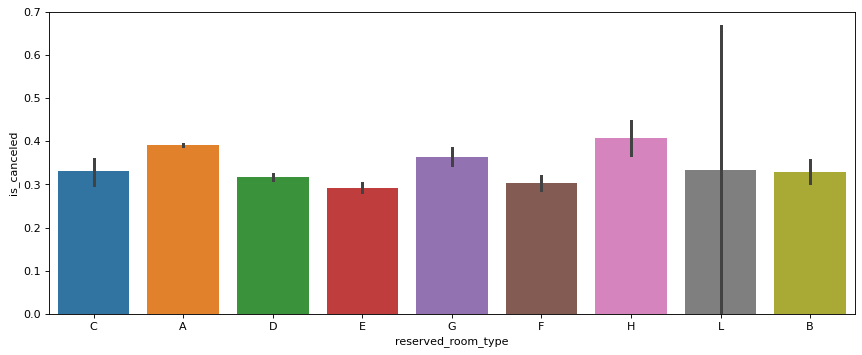

In [22]:
plt.figure(figsize = (13,5))
sns.barplot(x = 'reserved_room_type', y = 'is_canceled', data = data)

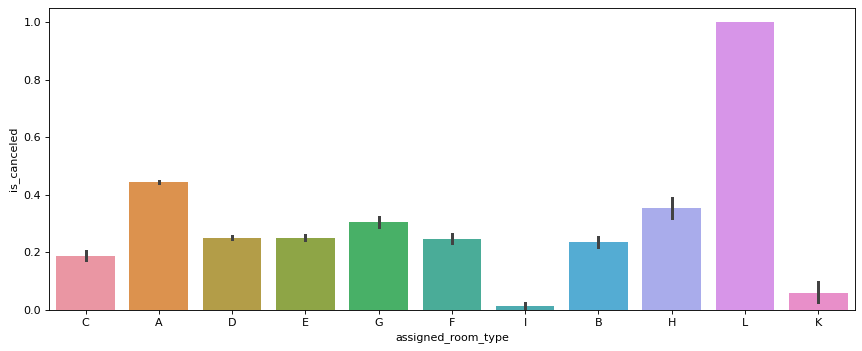

In [23]:
plt.figure(figsize = (13,5))
sns.barplot(x = 'assigned_room_type', y = 'is_canceled', data = data)

According to the plots above, the `reserved_room_type` do not have the strong correlation with cancellation status. However, some types in `assigned_room_type` might affect the cancellation status. Specifically, when the guests are assigned a room of type "L", it is very likely that they would cancel their reservation. However, when the guests are assigned a room of type "I" and "K", they are less likely to cancel their reservation.  

Finally, we study the relationship between Deposit Type and Cancellation Status.

Text(0, 0.5, 'Percentage of Cancellation')

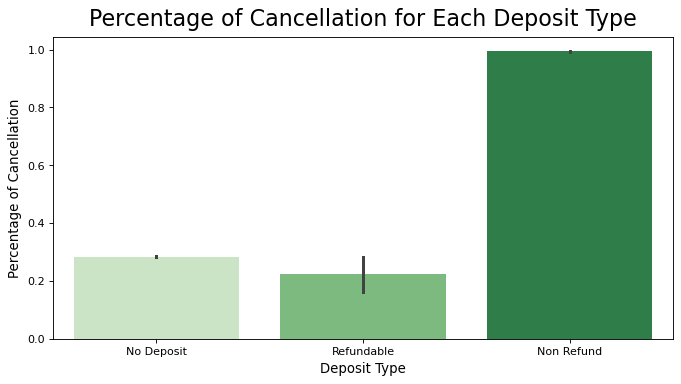

In [24]:
# Visualizing percentage of Cancellation for each deposit type:
plt.figure(figsize=(10,5)) 
plt.title("Percentage of Cancellation for Each Deposit Type", fontsize = 20, pad = 10)
sns.barplot(x=data['deposit_type'], y=data['is_canceled'], palette='Greens')
plt.xlabel("Deposit Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Cancellation", fontsize = 12, labelpad = 5)

To our great surprise, the reservations with the type of non refund have a much higher percentage of cancellation. This goes against our common sense, so we explore deeper into the data of reservation with non-refund type and output the following table.

In [25]:
data.groupby(data['deposit_type']).describe(include='O')[['market_segment','customer_type','distribution_channel']].T

deposit_type                No Deposit Non Refund       Refundable
market_segment       count      104461      14587              162
                     unique          8          5                5
                     top     Online TA     Groups           Groups
                     freq        56334       9172              130
customer_type        count      104461      14587              162
                     unique          4          3                4
                     top     Transient  Transient  Transient-Party
                     freq        76547      12909              132
distribution_channel count      104461      14587              162
                     unique          5          3                3
                     top         TA/TO      TA/TO           Direct
                     freq        84039      13651               98

According to the results above, most of the customers who made non-refund deposit belong to the transient groups from the Travel Agents or Tour Operators. We guess that these groups might come from some companies, they have to cancel the reservation because of the change of company plans and the company can bear the loss of deposit. Or they might be from the informal travelling agencies considering the extremely high cancellation and the abnormal cancellation behaviour. To confirm our guess, we need more information, probably the deposit policies of the hotels.

To reduce the cancellation, the hotel should mark the groups which have the abnormal cancellation, and request the higher deposit for them.

#### 2.3.3 Numerical Features

In this part, we visualised the correlation between all numerical variables and cancellation status. And then we selected the numerical vairables whose absolute values of correlation coeffocoents are more than 0.1 for specific analysis.

At first, we plot the correlation graph as following:

(20.0, 1.0)

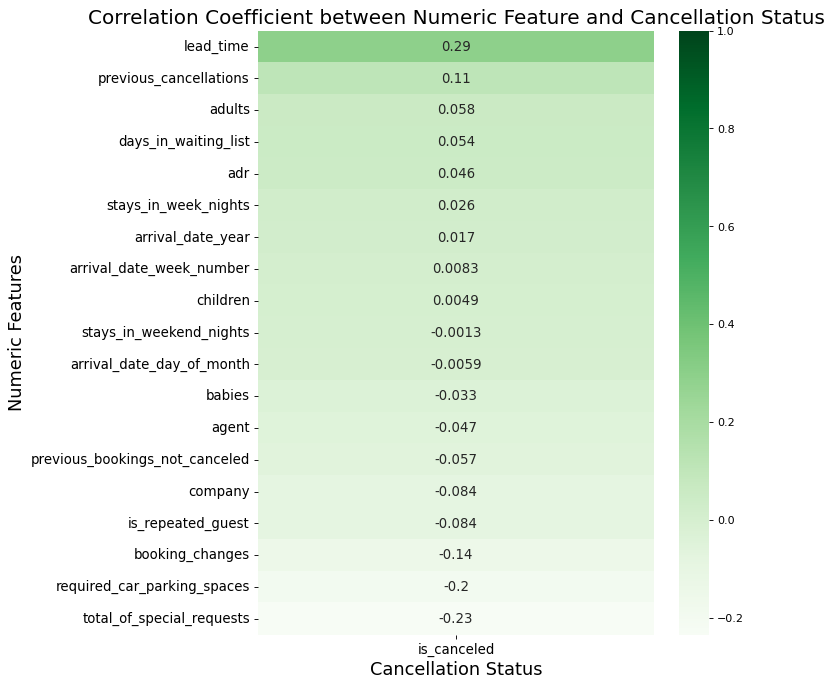

In [26]:
# Visualizing correlation coefficients between features and cancellation:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(data.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Greens')
ax.set_title('Correlation Coefficient between Numeric Feature and Cancellation Status', fontsize=18)
ax.set_xlabel('Cancellation Status', fontsize = 16)
ax.set_ylabel('Numeric Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12)
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1)

According to the plot above, we find:

For numerical variables `lead_time`, `previous_cancellation`, `booking_changes`, `required_car_parking_spaces`, and `total_of_special_requests`, their absolute values of correlation coefficient with cancellation status are more than 0.1, showing that they have the greater impacts on cancelltaion status. Specifically, the lead time is the most correlated variable with cancellation status.

The correlation coefficient of `lead_time` and `previous_cancellation` are all positive, indicating that when the length of lead time or the number of previous cancellation increase, the probability of cancellations would increase.

The correlation coefficient of `booking_changes`,  `required_car_parking_spaces`, and `total_of_special_requests` are all negative, indicating that when the number of booking changes increase, the probability of cancellations would decrease; similarly, when the number of required car parking spaces or the number of total special requests increase, the probability of cancellations would decrease.

In the following parts, we extracted these five variables with the strongest correlations and visualised their relationship with cancellation status.

At first, we plot the bar graph between the lead time, which is the most correlated variable, and cancellation status.

([<matplotlib.axis.XTick at 0x1ee4f274e80>,
 [Text(0, 0, 'Not Canceled'), Text(0, 0, 'Canceled')])

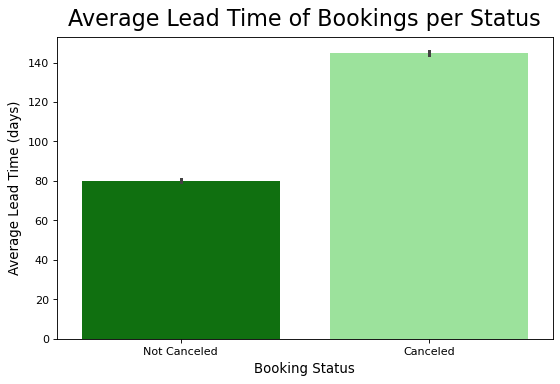

In [27]:
# Visualizing the average lead time for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Lead Time of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=data['is_canceled'], y=data['lead_time'], palette=['green', 'lightgreen'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Lead Time (days)", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])

Analyisng the plot above, we further conclude that the cancelled reservations have the higher average lead time than the not-cancelled reservations. This might because when the number of days that elapsed between the entering date of the booking into the PMS and the arrival date increase, guests have more time to change their plan and cancelled the reservations. And also, with the longer lead time, guests have the higher probabilities to suffer from unexpected situations that prevent their travelling plans such as sudden working arrangements or diseases.

Secondly, we plot the barplot between the total of special requests, which is the second correlated variable, and cancellation status.

([<matplotlib.axis.XTick at 0x1ee4f2114f0>,
 [Text(0, 0, 'Not Canceled'), Text(0, 0, 'Canceled')])

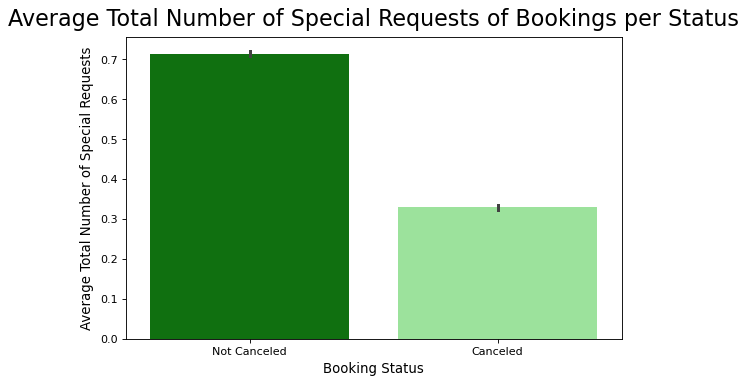

In [28]:
# Visualizing the total number of special requests for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Total Number of Special Requests of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=data['is_canceled'], y=data['total_of_special_requests'], palette=['green', 'lightgreen'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Total Number of Special Requests", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])

From the plot above, for the reservations cancelled, the average number of cutomers' special requests is lower, which means that as the number of special requests increases, the probability of cancellation would decrease. And so, customers who contacted the hotel before their arrival and made many special requests are less likely to cancel their cancellations. From this point, the hotel can keep in contact with the customers before their arrival and encourage them to clarify their special requests to reduce the probabilities of cancellation.

Thirdly, we plot the barplot between the number of required car parking spaces, which is the thirdly correlated variable, and cancellation status.

([<matplotlib.axis.XTick at 0x1ee4f2c7940>,
 [Text(0, 0, 'Not Canceled'), Text(0, 0, 'Canceled')])

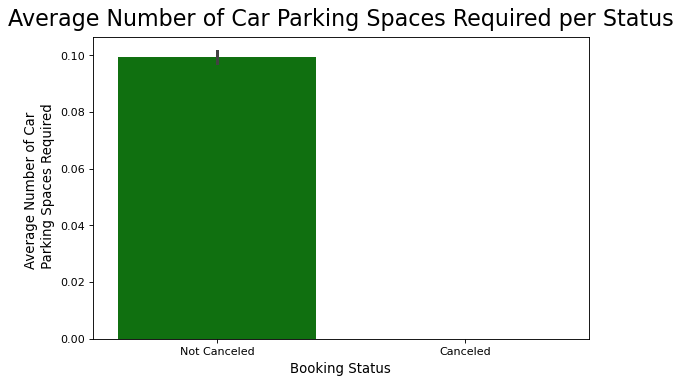

In [29]:
# Visualizing the total number of requested parking spaces for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Number of Car Parking Spaces Required per Status", fontsize = 20, pad = 10)
sns.barplot(x=data['is_canceled'], y=data['required_car_parking_spaces'], palette=['green', 'lightgreen'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Number of Car \n Parking Spaces Required", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])

In [30]:
data.groupby(["required_car_parking_spaces"])["is_canceled"].agg(["value_counts"])

value_counts
required_car_parking_spaces is_canceled              
0                           0                   67602
                            1                   44199
1                           0                    7376
2                           0                      28
3                           0                       3
8                           0                       2

The plot above indicates that for the reservations that are not cancelled, its number of car parking spaces required is larger. That is, as the number of car parking spaces required increases, the probability of cancellation would decrease. Similarly to the number of special requests, if customers contacted the hotel before their arrival and made the request on the parking spaces, they tend to keep their bookings. On the one hand, since the customers who have the requests are usually the one who think a lot and almost made a decision about the reservations, they are less likely to change their mind after the reservations. 

On the other hand, we can see from the table that the customers who request parking spaces never cancel their bookings. This show that the number of parking areas are crucial for customers. Thus it is a good choice for the hotel to build more parking areas to reduce the cancellation.

Finally, we plot the barplot between the number of required car parking spaces and cancellation status, and the barplot between the number of previous cancellation and current cancellation status.

([<matplotlib.axis.XTick at 0x1ee4f312fa0>,
 [Text(0, 0, 'Not Canceled'), Text(0, 0, 'Canceled')])

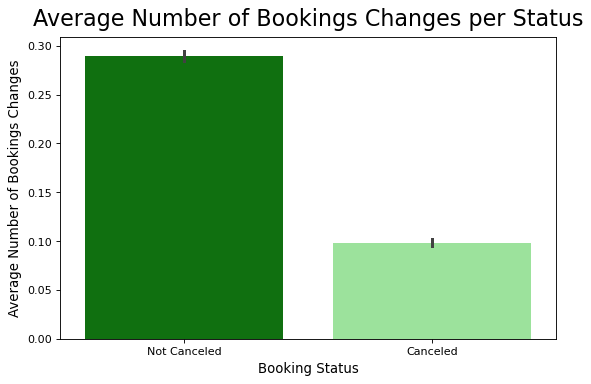

In [31]:
# Visualizing the number of booking changes for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Number of Bookings Changes per Status", fontsize = 20, pad = 10)
sns.barplot(x=data['is_canceled'], y=data['booking_changes'], palette=['green', 'lightgreen'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Number of Bookings Changes", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])

([<matplotlib.axis.XTick at 0x1ee4f3668b0>,
 [Text(0, 0, 'Not Canceled'), Text(0, 0, 'Canceled')])

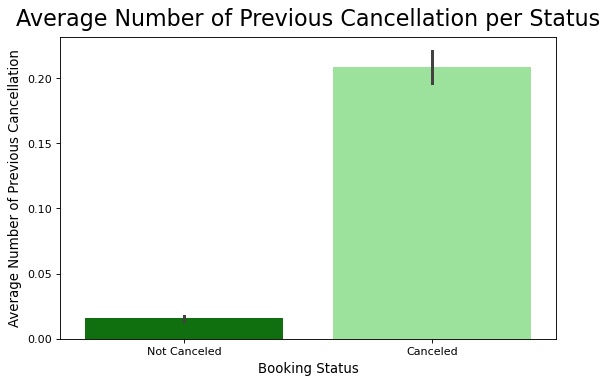

In [32]:
# Visualizing the average number of previous cancellation for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Number of Previous Cancellation per Status", fontsize = 20, pad = 10)
sns.barplot(x=data['is_canceled'], y=data['previous_cancellations'], palette=['green', 'lightgreen'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Number of Previous Cancellation", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])

It is obvious from two plots that the reservation that are cancelled has the lower average number of booking changes the higher number of previous cancellations. This make sense since customers who change their bookings a lot are usually less determined about their reservations, they have the higher probability to cancel the bookings in the end. And the customers who have the higher previous cancellations also have the higher probability to cancel their bookings currently. They might belong to some special groups rather than general travellers. For example, some informal agencies who sell scalped tickets might always cancel their bookings in the end. To reduce the cancellation, the hotel should defferentiate these informal agencies from the general travells.

#### 2.3.4 Further findings 

(1). ADR vs. Market segments  

`adr` is the Average Daily Rate calculated by dividing the sum of all lodging transactions by the total number of staying nights. Since it's  a variable related to revenue in this dataset, we also would like to explore it more. Here, we plot its relationship with market segments.

In [34]:
# Only actual guests.
full_data_guests = data[data['is_canceled'] == 0]
# Boxplot for price per night by market segments.
px.box(data_frame = full_data_guests, x = 'market_segment', y = 'adr',template = "plotly",title="Average Daily Rate By Market Segment")

According to the plot above, we find that:  
* The prices in both Direct and Online TA market segments are relatively higher, together with higher variation. This option may cause some customers who have already booked online to cancel their orders and then book from offline.
* Aviation, Corporate and Offline TA/TO have lowest variation of prices. This is because these segments usually have a flat price contract with the hotel and also do not have the same yield as other segments.

(2). ADR vs. Arrival Date Month 

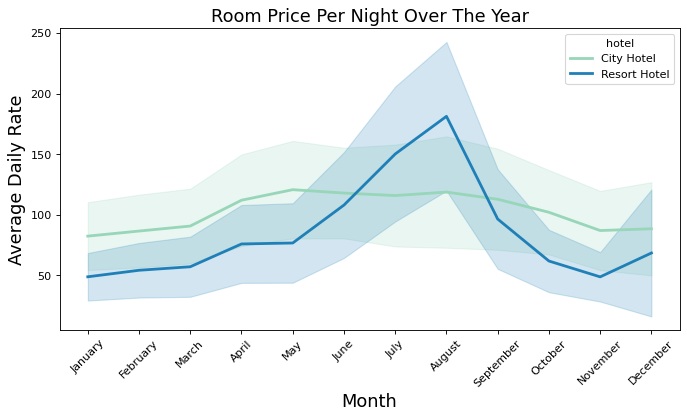

In [35]:
# monthly data
room_prices_monthly = full_data_guests[["hotel", "arrival_date_month", "adr"]].sort_values("arrival_date_month")
# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
room_prices_monthly["arrival_date_month"] = pd.Categorical(room_prices_monthly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(10, 5))
# palette = sns.color_palette("crest", 2)
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=room_prices_monthly, palette='YlGnBu',
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room Price Per Night Over The Year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Average Daily Rate", fontsize=16)
plt.show()

According to this plot, we find:  
* The prices in the Resort hotel are much higher during the summer. This mainly because summer is the peak tourist season.
* The price of the city hotel varies less and is most expensive during spring and autumn.

(3). Number of Guests vs. Arrival Date Month 

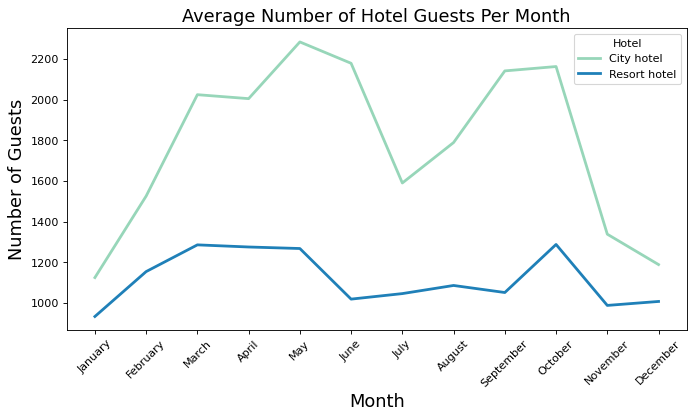

In [36]:
# Reference: https://www.kaggle.com/code/marcuswingen?scriptVersionId=29742476&cellId=23

# Separate data for Resort Hotel and City hotel. (Note only actual guests counted)
rh = data.loc[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]
ch = data.loc[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]

# Create a DateFrame with the relevant data.
rh_monthly = rh.groupby("arrival_date_month")["hotel"].count()
ch_monthly = ch.groupby("arrival_date_month")["hotel"].count()
rh_guests_data = pd.DataFrame({"Month": list(rh_monthly.index),
                                "Hotel": "Resort hotel", 
                                "# of Guests": list(rh_monthly.values)})
ch_guests_data = pd.DataFrame({"Month": list(ch_monthly.index),
                                "Hotel": "City hotel", 
                                "# of Guests": list(ch_monthly.values)})
# Combine two datasets.
full_guests_data = pd.concat([rh_guests_data,ch_guests_data], ignore_index=True)
full_guests_data["Month"] = pd.Categorical(full_guests_data["Month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years.
full_guests_data.loc[(full_guests_data["Month"] == "July") | (full_guests_data["Month"] == "August"),
                    "# of Guests"] /= 3
full_guests_data.loc[~((full_guests_data["Month"] == "July") | (full_guests_data["Month"] == "August")),
                    "# of Guests"] /= 2

# Plot Average Number of Hotel Guests Per Month.
plt.figure(figsize=(10, 5))
sns.lineplot(x = "Month", y="# of Guests", hue="Hotel", data=full_guests_data, palette='YlGnBu',
             hue_order = ["City hotel", "Resort hotel"], size="Hotel", sizes=(2.5, 2.5))
plt.title("Average Number of Hotel Guests Per Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of Guests", fontsize=16)
plt.show()

We can see from the plot above that:  
* The City hotel has more guests during spring and autumn. Moreover, the prices in these two seasons are also highest.
* Guest numbers for the Resort hotel go down slighty from June to September. This may mainly because of the high prices in summer peaks.
* Both hotels have the fewest guests during the winter.

### 2.4 Power Predict Score 
​
In this section, we would like to learn about the the correlations between our variables, not only the numeric but also the categorical ones. Hence, we introduce the **Predict Power Score** (PPS). There are four main applications of PPS and PPS matrix: 
* Find patterns in the data
* Feature selection
* Detect information leakage
* Data Normalization  
​
Here we mainly use it to help us identify feature patterns in the data, which can also facilitate the selection of features later.

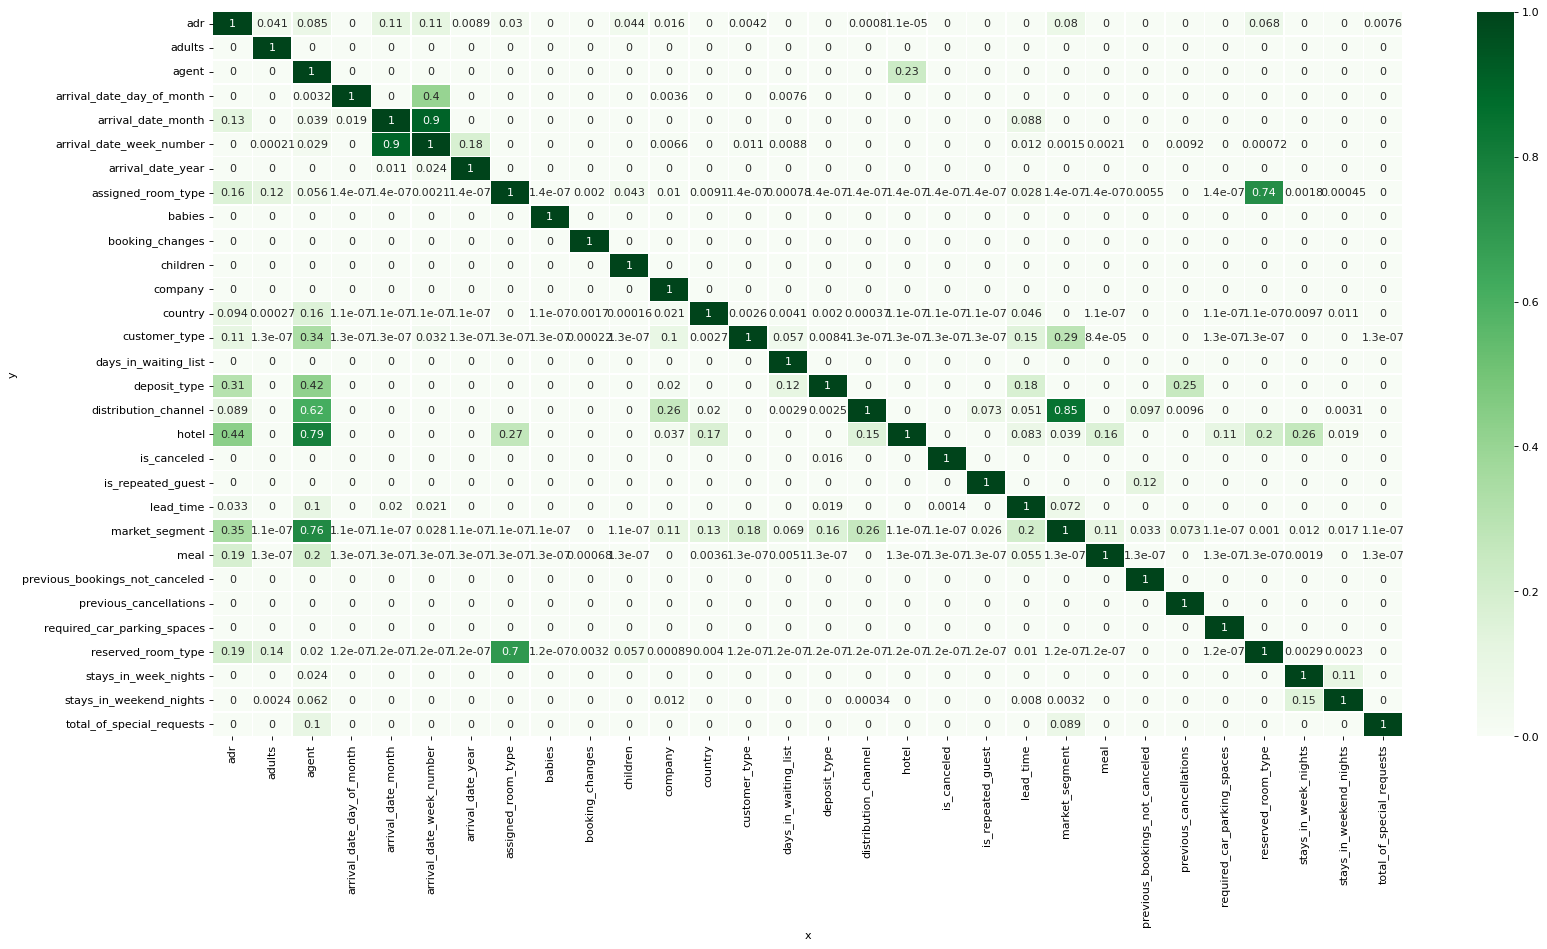

In [37]:
warnings.filterwarnings('ignore')
# Calculate the Predict Power Score matrix.
mat = pps.matrix(data)

mat = mat[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# Plot the Predict Power Score
plt.figure(figsize = (24, 12))
sns.heatmap(mat, vmin=0, vmax=1, cmap="Greens", linewidths=0.5, annot=True)
plt.show()

In [38]:
n_var = len(mat)
high_cor = []
high_cor_r = []
high_cor_c = []
mat_row = mat.index.values
mat_col = mat.columns.values

for i in np.arange(n_var):
    for j in np.arange(n_var):
        if mat.iloc[i,j]>=0.5 and mat.iloc[i,j]!=1:
            high_cor_r.append(mat_row[i])
            high_cor_c.append(mat_col[j])
            high_cor.append(mat.iloc[i,j])

# Features we may want to drop
need_to_drop = {
    "x": high_cor_r,
    "y": high_cor_c,
    "pps": high_cor
}
need_to_drop = pd.DataFrame(need_to_drop)
need_to_drop

x                         y       pps
0        arrival_date_month  arrival_date_week_number  0.902756
1  arrival_date_week_number        arrival_date_month  0.899019
2        assigned_room_type        reserved_room_type  0.741021
3      distribution_channel                     agent  0.616379
4      distribution_channel            market_segment  0.849117
5                     hotel                     agent  0.794708
6            market_segment                     agent  0.755976
7        reserved_room_type        assigned_room_type  0.696272

According to the PPS matrix, we find out that:
* `distribution_channel`, `hotel` and `market_segment` are mostly affected by the `agent` feature. This helps understand that these hotels have different agents when it comes to specific segments of clients. For example, *Booking.com* is an agent that is only represented in the Online market segment.  
* Not surprisingly, the `arrival_date_month` are effected by `arrival_date_week_number`. We may consider drop one of them later in our model.
* Also, it makes sense that the `reserved_room_type	` is highly affected by the `assigned_room_type`. We may also just need one of them for prediction.

### 2.5 Customer Clustering

Inspired by an article written by *Julia Kelman* about the *Customer Analysis*, in this section, we are going to explore whether we can divide our customers into clusters by **K-means Clustering**, which can help us get better understanding of the customer groups. Moreover, we would like to add these clusters as an additional feature in our model later and  thus improve the model predivtive power.  
Before starting the clustering, let's get the dataset prepared. There are a few things we need to note:  
* Since the goal of our model is to predict whether the customers will cancel the order, we must delete the variable of interest `is_canceled`.  
* Known that the k-Means algorithm is not applicable to categorical data, for simplicity, we will only consider numerical features in the K-means Clustering and therefore we will drop all categorical variables as well.  
* Moreover, both `agent` and `company` features include large amounts of data that are de-identified and therefore difficult to interpret. Therefore, we also drop these two variables.  

In [39]:
# Copy of the data set.
df = data.copy()

# Drop categorical variables
X = df.drop(columns=['is_canceled', 'hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 
                     'distribution_channel', 'reserved_room_type', 'assigned_room_type','deposit_type', 'customer_type',
                     'agent', 'company'])
X.head()

lead_time  arrival_date_year  arrival_date_week_number  \
0        342               2015                        27   
1        737               2015                        27   
2          7               2015                        27   
3         13               2015                        27   
4         14               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0       2       0.0       0                  0                       0   
1       2       0.0       0                  0                       0   
2       1       0.0       0                  0                       0   
3       1       0.0       0                  0                       0   
4       2       0.0       0                  0                       0   

   previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
0                               0                3                     0   
1                               0                4                     0   
2                               0                0                     0   
3                               0                0                     0   
4                               0                0                     0   

    adr  required_car_parking_spaces  total_of_special_requests  
0   0.0                            0                          0  
1   0.0                            0                          0  
2  75.0                            0                          0  
3  75.0                            0                          0  
4  98.0                            0                          1

#### K-means
As we know a good K-means clustering model is one with low inertia and a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases. In order to identify the best number of clusters to create, we will evaluate the relationship between inertia and the number of clusters. In this project, we will try K from range (1, 10) and see what happens.   

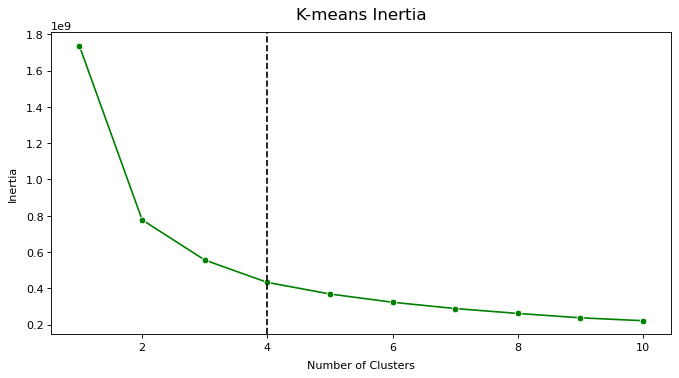

In [40]:
# K-means algorithm.
distortions = []
k_list = list(range(1, 11))
for k in k_list:
    km = KMeans(n_clusters=k, random_state=1).fit(X)
    distortions.append(km.inertia_)
    
# Visualizing the relationship of K-Means Inertia and Number of Clusters.
plt.figure(figsize=(10,5))
sns.lineplot(x=k_list,y=np.array(distortions), marker='o', color='green')
plt.axvline(4, linestyle='--', color='black')
plt.xlabel('Number of Clusters', fontsize = 10, labelpad = 7)
plt.ylabel('Inertia', fontsize = 10, labelpad = 7)
plt.title("K-means Inertia", fontsize = 15, pad = 12)
plt.show()

Consider the *elbow* method, the location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. Here, we would suggest creating 4 clusters. So, we add the clusters we have obtained as a new feature in our dataset.

In [41]:
# Create 4 customer clusters.
km4 = KMeans(n_clusters = 4, random_state = 1)
clusters = km4.fit_predict(X)

# Create a "clusters" feature in our dataset.
df['clusters'] = clusters

# Display the mean of each feature for 4 clusters.
df.groupby(df['clusters']).mean().T

clusters                                  0            1            2  \
is_canceled                        0.451616     0.250101     0.644114   
lead_time                        160.815925    31.491202   326.614005   
arrival_date_year               2016.284590  2016.052907  2016.046937   
arrival_date_week_number          27.048556    25.189342    31.696196   
arrival_date_day_of_month         16.034723    15.570905    15.491273   
stays_in_weekend_nights            1.148884     0.802907     0.894305   
stays_in_week_nights               3.033037     2.127174     2.716292   
adults                             1.912881     1.724271     1.946040   
children                           0.096237     0.044029     0.047076   
babies                             0.007088     0.007670     0.003199   
is_repeated_guest                  0.004403     0.063235     0.015089   
previous_cancellations             0.089836     0.050552     0.339476   
previous_bookings_not_canceled     0.023919     0.299062     0.010848   
booking_changes                    0.242842     0.202730     0.194493   
agent                             80.502639    74.668425    60.382310   
company                            5.681967    18.901756     6.000348   
days_in_waiting_list               3.415176     0.542700     9.567763   
adr                              103.256155    75.609573    85.082807   
required_car_parking_spaces        0.038845     0.077267     0.013838   
total_of_special_requests          0.576112     0.530883     0.340588   

clusters                                  3  
is_canceled                        0.348003  
lead_time                         43.206986  
arrival_date_year               2016.269583  
arrival_date_week_number          28.743213  
arrival_date_day_of_month         16.152300  
stays_in_weekend_nights            0.906882  
stays_in_week_nights               2.424001  
adults                             2.020664  
children                           0.279137  
babies                             0.012753  
is_repeated_guest                  0.011067  
previous_cancellations             0.005361  
previous_bookings_not_canceled     0.024468  
booking_changes                    0.235129  
agent                             76.609978  
company                            3.139504  
days_in_waiting_list               0.120612  
adr                              167.287848  
required_car_parking_spaces        0.094069  
total_of_special_requests          0.795910

#### Cluster Analysis
From the above statistics we have obtained for each cluster, we have tried to identify the characteristics of each group and our findings are given below:  


- `Cluster 0`:  
 + Second high cancellation rate.  
 + Higher than average weekend and week nights.  

This group may be refered to as people who prefer **Longer Stays**.


- `Cluster 1`: 
 + Lowest cancellation rate.  
 + Shortest lead time with mean 31 days.  
 + Highest number of previous bookings not canceled.  

These characteristics may suggests **Regular Customer**. Because they may have been familiar with the hotel and may be less likely to cancel the booking. 


- `Cluster 2`: 
 + Highest cancellation rate.
 + Longest lead time with mean 327 days.  
 + Higher mean number of previous cancellations.
 + Higher mean number of days in waiting list.  

This group is most likely to be made up of people who love to make plans, probably the younger generation. Due to the high cancellation risk of this group, cluster 2 will be refered to as the **Cancellation Risk** group.


- `Cluster 3`: 
 + Average cancellation rate
 + Higher mean number of children and babies
 + Higher average daily room price
 + Slightly higher number of special requests   

This group is most likely to represent the **Family Groups**, since they have higher chance to be with children and also higher than average special requests.

In [42]:
# Renaming the clusters
df['clusters'] = df['clusters'].map({0:'Longer Stays', 1:'Regular Customer', 2:'Cancellation Risk', 3:'Family Groups'})

Text(0, 0.5, 'Percentage of Canceled Bookings')

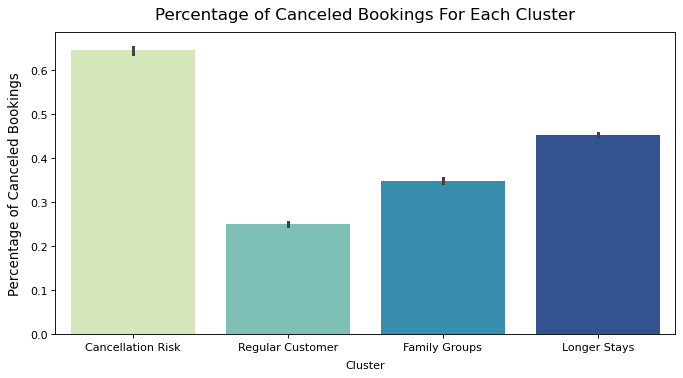

In [43]:
# Visualizing the percentage of canceled bookings for each cluster: 
plt.figure(figsize=(10,5)) 
plt.title("Percentage of Canceled Bookings For Each Cluster", fontsize = 15, pad = 12)
sns.barplot(x=df['clusters'], y=df['is_canceled'], palette='YlGnBu')
plt.xlabel("Cluster", fontsize = 10, labelpad = 7)
plt.ylabel("Percentage of Canceled Bookings", fontsize = 12, labelpad = 7)

We can note that the `Cancellation Risk` group has the highest percentage of canceled bookings while the `Regular Customer` has the lowest.

Text(0, 0.5, 'Average Lead Time')

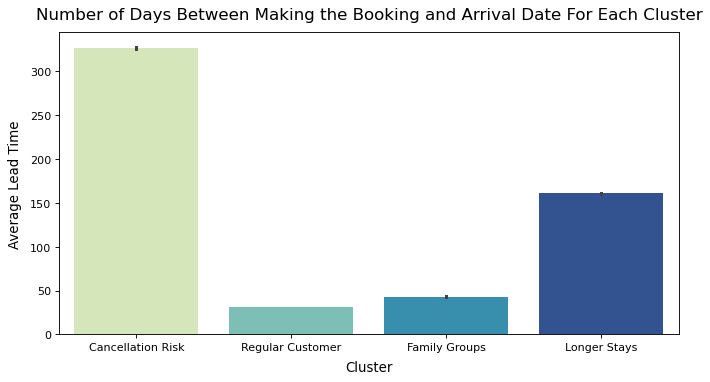

In [44]:
# Visualizing the average lead time for each cluster: 
plt.figure(figsize=(10,5)) 
plt.title("Number of Days Between Making the Booking and Arrival Date For Each Cluster", fontsize = 15, pad = 12)
sns.barplot(x=df['clusters'], y=df['lead_time'], palette='YlGnBu')
plt.xlabel("Cluster", fontsize = 12, labelpad = 7)
plt.ylabel("Average Lead Time", fontsize = 12, labelpad = 7)

We note that the group with highest `Cancellation Risk` tend to book earlier than other groups. This somehow explains the highest cancellation rate because the longer the time between departures, the more likely the plan will change.

Text(0, 0.5, 'Average Daily Rate')

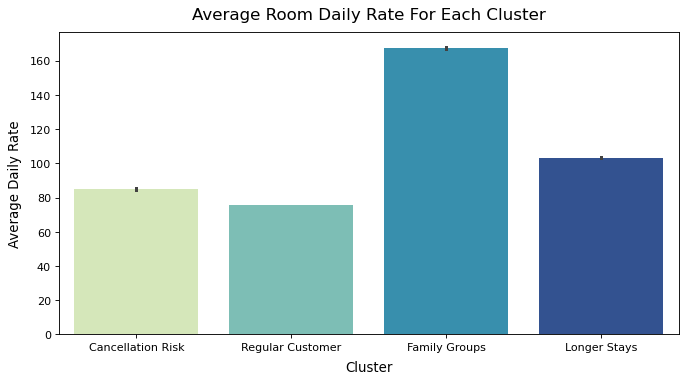

In [45]:
# Visualizing the average daily room rate for each cluster: 
plt.figure(figsize=(10,5)) 
plt.title("Average Room Daily Rate For Each Cluster", fontsize = 15, pad = 12)
sns.barplot(x=df['clusters'], y=df['adr'], palette='YlGnBu')
plt.xlabel("Cluster", fontsize = 12, labelpad = 7)
plt.ylabel("Average Daily Rate", fontsize = 12, labelpad = 7)

We can easily see from the plot that the `Family Groups` are more willing to spend more money on their room when compared to other clusters.

Text(0, 0.5, 'Number of Special Requests')

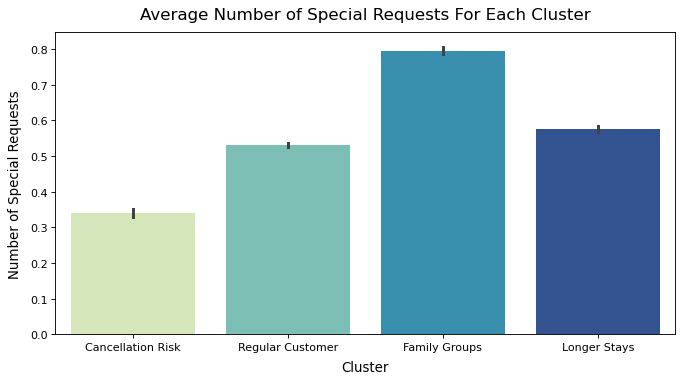

In [46]:
# Visualizing the total number of special requests for each cluster: 
plt.figure(figsize=(10,5)) 
plt.title("Average Number of Special Requests For Each Cluster", fontsize = 15, pad = 12)
sns.barplot(x=df['clusters'], y=df['total_of_special_requests'], palette='YlGnBu')
plt.xlabel("Cluster", fontsize = 12, labelpad = 7)
plt.ylabel("Number of Special Requests", fontsize = 12, labelpad = 7)

As what we have found for the `Family Groups`, slightly higher than average mean number of special requests is a characteristic of them.

## 3. Model Fitting and Tuning

### 3.1 Model Rejected 
For this project, we first have tried random forest model. The accuracy score of this model is high with 0.9917896988507675 for the train set and 0.8693901518328999 for the test set. However, it turned out that the accuracy score for train set and test set are of significant difference, so we conclude that this model is overfit. Also, it is a black-box model which does not indicate how it processes internally so it is hard to interpret. As a result, we decide to use the logistic regression for model fitting.

### 3.2 Moddel Fit: Logistic Regression
The project provides a binary output where 1 indicates cancellation and 0 indicates non-cancellation. Logistic regression can be considered as a discriminant classifier with two changes of linear regression. Firstly, the Gaussian distribution of the output y is replaced by a Bernoulli distribution. Secondly, the linear input function $w^Tx$ is passed through a logistic link function $g: \mathbb{R}\to [0, 1]$.
Mathematically, we have our logistic link function in the form of $$g(w^Tx) = \frac{1}{1+exp(-w^Tx)}$$
The logistic regression model is of the form of $$y\sim Bern([1+exp(-w^Tx)]^{-1})$$
The LogisticRegression model is provided by the linear_model submodule.


Before fitting the model, we need do some prepartions to our variable.

We exclude features `agent`, `company` and `country` since these features contain many categorical data which is not applicable and difficult to interpret. We also remove `reserved_room_type ` and `distribution_channel` because the former one has high correlation with `assigned_room_type` feature and the latter one has high correlation with `market_segment` feature. `arrival_date_week_number` is also excluded since it has high correlation with `arrival_date_week_month`.

We also make dummy variables for the variable `arrival_date_month`,  `meal`,  `market_segment`,  `assigned_room_type`,  `deposit_type`,  `customer_type`,  `clusters` and `hotel`. We simply use the function `pd.get_dummies`. There will be new columns in the data set with different values representing different types for each categorical variable.

We can then proceed to split our data into two distinct sets using `train_test_split` function. The first one is the testing set containing our training data `X_train` and `y_train` which is used for determining the feature weights. The second one is the test set containing tesing data `X_test` and `y_test`. Note that we need to include the argument `stratify` in the function to avoid imbalanced data.

In [ ]:
rs = 123
d_1 = df.copy()
d_1 = pd.get_dummies(d_1, columns=['arrival_date_month', 'market_segment', 'assigned_room_type', 
                                   'deposit_type', 'customer_type', 'clusters', 'hotel','meal'])
X = d_1.drop(columns=['is_canceled', 'agent', 'company', 'country', 'reserved_room_type', 
                      'distribution_channel','arrival_date_week_number'])
y = d_1['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rs, test_size=0.20, stratify=y)

In [ ]:
X_train.shape

(95368, 64)

Now we can fit the model to the training set. And we use `lg.score` to obtain the accuracy score, i.e. about **78.4%**.

In [ ]:
lg = LogisticRegression(random_state=rs).fit(X_train,y_train)

lg.score(X_train,y_train)

0.7837115174901435

The accuracy score for the testing set is about **78.4%** which is just a little bit different from the accuracy score for the training set so this model is not overfit or underfit.

In [ ]:
lg.score(X_test,y_test)

0.7839107457428068

### 3.3 Model Refinement

* Tuning with `GridSearchCV`

    `penalty`, `C`, `solver`, and `max_iter` are hyperparameters of the Logistic Regression model and we can use cross validation to find a good value in order to better fit our data. To achieve this goal, we cen use `GridSearchCV` function to optimise the parameters we will pass to the Logistic Regression model. In this study, we set a dictionary to store lists of values for the four parameters we need, and employ a 5-fold cross validation to select the best value for `penalty`, `C`, `solver`, and `max_iter`.

In [ ]:
# grid search
lg_params = {
    'penalty': ['l1,','l2'], 
    'C': np.logspace(-3,3,7),
    'solver':['lbfgs','liblinear','saga'],
    'max_iter': [100,300,500]
}

# Perform Grid Search
lg_gs = GridSearchCV(LogisticRegression(random_state=rs),
                 lg_params,
                 cv = 5,
                 scoring = 'accuracy')
lg_cv = lg_gs.fit(X_train, y_train)


We can then call `best_params_` for the GridSearchCV object to get the best values of the parameters. The parameters for the best model fit are: `C`=0.1, `max_iter`=100, `penalty`=l2, and `solver`=liblinear.

In [ ]:
print(lg_cv.best_params_)

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


The training score of this refined model is about **81.0%**, which is **higher** than the training score of **78.4%** we have obtained for the previous Logistic Regression model (i.e. the solver is lbfgs and C=1.0 by default). 

Additionally, we can see the the training score and the testing score are very close to each other, which indicates the model is neither overfit nor underfit, and the testing accuracy is **81.0%**.

In [ ]:
lg_cv.score(X_train,y_train)

0.8105653888096637

In [ ]:
lg_cv.score(X_test,y_test)

0.8099152755641306

### 3.4 Model Evaluation

#### Coefficient Analysis

In [ ]:
# coefficient evaluation
param = lg_cv.best_estimator_.coef_[0]
var = X_train.columns
coefficients = {'Variables': var, "Coefficients": param}
coefficients = pd.DataFrame(coefficients)

# filter ten features with strongest coefficients
top_coef = coefficients.sort_values(by="Coefficients",key=abs,ascending=False).head(10)

# take exponential and pencent(*100) for each coefficient to help interpret
top_coef['exp'] = np.exp(top_coef['Coefficients'])
top_coef['percent'] = (top_coef['exp']-1)*100
top_coef

Variables  Coefficients        exp      percent
14   required_car_parking_spaces     -3.295577   0.037047   -96.295334
48       deposit_type_Non Refund      2.773279  16.011052  1501.105248
9         previous_cancellations      2.471756  11.843222  1084.322178
47       deposit_type_No Deposit     -1.922893   0.146183   -85.381662
49       deposit_type_Refundable     -0.851490   0.426779   -57.322128
15     total_of_special_requests     -0.745721   0.474392   -52.560795
34      market_segment_Online TA      0.739373   2.094621   109.462089
36          assigned_room_type_A      0.676330   1.966647    96.664683
33  market_segment_Offline TA/TO     -0.590973   0.553788   -44.621185
57     clusters_Regular Customer     -0.512018   0.599285   -40.071476

To easily interpret the coefficients in the Logistic Regression model, we take the exponential and percentage change of the variables with 10 strongest absolute coefficient values.

* From the table below, we can observe `deposit_type_Non Refund`, `previous_cancellations`, `market_segment_Online TA`, and `assigned_room_type_A` are the four features with high coefficients in predicting a hotel booking will be **canceled**. We can further interpret the two features with strongest coefficients in categorical and numerical way separately:

    * If the deposit type is non-refund and other features remain constant, the booking will have 1501% more probability to be canceled than with other deposit type. This result is linked with our EDA part, the group of customers who have had a non-refundable deposit has a much higher percentage in making cancelations. It is a counter-intuitive result, and as the EDA has already explained, it may because the market segment designation for customers with non-refundable deposit are always groups, and the hotel may consider the groups have high risk to cancel the booking.
    
    * An increase with 1 unit in `previous_cancelations` with other features unchange, the booking will have a 1084% probability increase to be canceled. This result is intuitive that customers who have made cancelations before will be more likely to cancel the booking another time.




* We can also observe `required_car_parking_spaces`, `deposit_type_No Deposit`, `deposit_type_Refundable`, `total_of_special_requests`, `market_segment_Offline TA/TO` and `clusters_Regular Customer` are the six features that have relatively high coefficients in predicting a hotel book will be **not canceled**. We can further interpret three features with strongest coefficients in categorical and numerical way separately:

    * For a 1 unit increase in the number of car parking spaces required by the customer with other features hold constant, the booking will be 96% more likely to reserved (i.e. 96% less likely to be canceled). This result can be also explained by the EDA part. From the histogram displayed in EDA part, we can find when the value `required_car_parking_space` is more than 0, the corresponding bar is very close to 0, which means there are few number of cancelations if the customer requires at least one car parking space.

    * If the hotel does not need to make deposit or the deposit is refundable, the booking will be 85% and 57% more likely to reserved, respectively. As we have previous mentioned, customers may care about their potential financial risk if canceling the hotel booking due to some emergency situation. When there is no deposit or deposit is refundable, customers will not need to worry about unnecessary financial losses, and so they will be less likely to cancel the booking.

* According to all the numerical features with large coefficients, we can find when the customers requires car parking space and make special requests, they are less likely to cancel the booking. It is intuitive that people might have high tendency to choose to live in the hotel when they make requirements.

* According to all the categorical features with large coefficients, we can know customers care about **deposit type** and **market segment**. Both of these two features corresponds to some financial aspect. We have explained the financial risk the customers might face due to different deposit type in the previous section, and we recommend the hotel can **change the deposit policy** to no deposit or deposit refundable in order to reduce cancelation rate. Additionally, as we explained in the EDA part, online TA is the market segment with high mean price and high variation in price, and offline TA/TO is the market segment with low mean price and low variation in price. Customers may favor the way price does not fluctuate more to avoid some financial loss. Also, we find that the the Regular Customer cluster is less likely to cancel the booking, which corresponds to the result in our previous cluster analysis.

#### Confusion Matrix

We are now introducing 4 quantities here to evaluate our model.

False positive(FP) is when we have predicted 'canceled' but actually 'not canceled'.

False negative(FN) is when we have predicted 'not canceled' but actully 'canceled'.

True positive(TP) is when we predicted 'canceled' and it is indeed 'canceled'.

True negative(TN) is when we predicted 'not canceled' and it is indeed 'not canceled'.

These quantities can be computed and presented in a form of confusion matrix. Confusion matrix can be obtained by `confusion_matrix` function.

Text(177.77777777777777, 0.5, 'True Class')

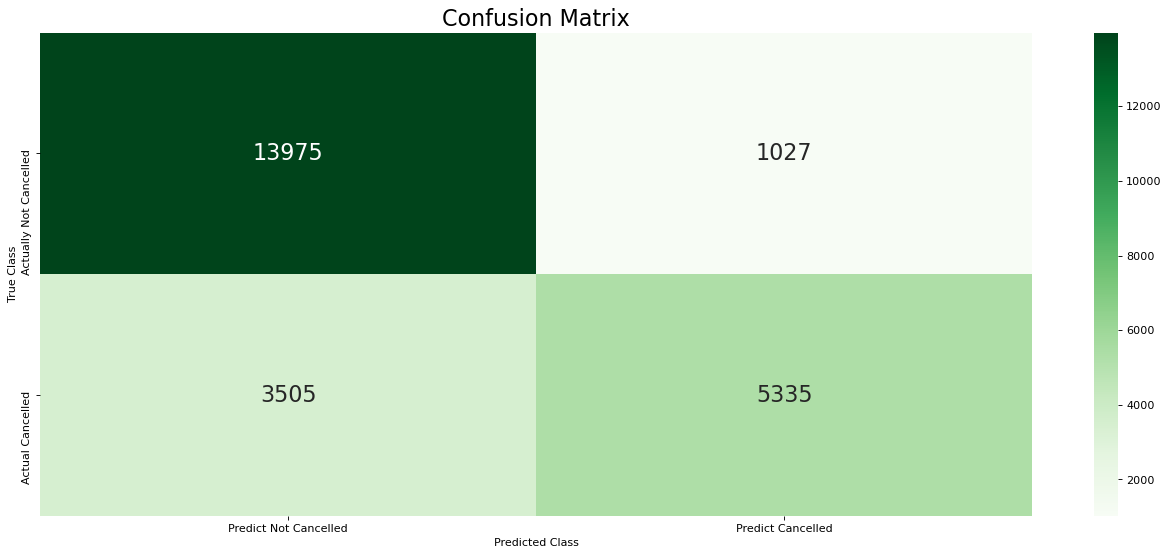

In [ ]:
# model evaluation
# use logistic regression to predict x_test
y_pred = lg_cv.predict(X_test)

# form a confusion matrix
eval = confusion_matrix(y_test,y_pred)
eval = pd.DataFrame(eval, 
                    index=['Actually Not Cancelled', 'Actual Cancelled'],
                    columns=['Predict Not Cancelled', 'Predict Cancelled'])

plt.figure(figsize=(20,8))
sns.heatmap(eval, annot=True, cmap="Greens", fmt='g', xticklabels=eval.columns, yticklabels=eval.index, annot_kws={"size": 20})
plt.title("Confusion Matrix", size=20)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

We can see from above confusion matrix we have:

1027 cases when we have predicted 'cancelled' but actually 'not cancelled'.

3505 cases when we have predicted 'not cancelled' but actually 'cancelled'.

5335 cases when we predicted 'cancelled' and it is indeed 'cancelled'.

13975 cases when we predicted 'not cancelled' and it is indeed 'not cancelled'.

Next, we evaluate the confusion matrix by computing the proportion of correctly classified, canceled bookings correctly classified and not canceled bookings correctly classified. True positive rate and true negatice rate are also computed for evaluation.

In [ ]:
# evaluate confusion matrix
TP = 5335
TN = 13975
FP = 1027
FN = 3505

total = TP+TN+FP+FN
print(f'Correctly classified: {np.round((TP+TN)/total*100)}%')
print(f'Canceled bookings correctly classified: {np.round(TP/(TP+FN)*100)}%')
print(f'Not canceled bookings correctly classified: {np.round(TN/(TN+FP)*100)}%')
print(f'Bookings predicted canceled that are actually canceled: {np.round(TP/(TP+FP)*100)}%')
print(f'Bookings predicted not canceled that are actually not canceled: {np.round(TN/(TN+FN)*100)}%')
print(f'Wrongly predicted cancelled bookings: {np.round(FP/total*100)}%')
print(f'Wrongly predicted not cancelled bookings: {np.round(FN/total*100)}%')

Correctly classified: 81.0%
Canceled bookings correctly classified: 60.0%
Not canceled bookings correctly classified: 93.0%
Bookings predicted canceled that are actually canceled: 84.0%
Bookings predicted not canceled that are actually not canceled: 80.0%
Wrongly predicted cancelled bookings: 4.0%
Wrongly predicted not cancelled bookings: 15.0%


We have correctly classified 81.0% of the bookings in general. We have correctly classified 60.0% of canceled bookings and 93.0% of not cancelled bookings. If we predict a booking will be cancelled, there would be 84.0% probability it actually cancelld. If we predicted a booking will not be cancelled, there would be 80.0% probability indeed not be cancelled.

We can also see there are 1027 bookings our model predicts to be cancelled but actually not cancelled, which means in 4.0% of the cases, the hotel will not prepare for the room or make the room overbooked when the guest arrives, and it will risk damaging the hotel's reputation. There are 3505 bookings our model predicts to be not cancelled but actually cancelled, which means in 15.0% of the cases, the hotel will prepare room service on the wrong reservations, and they will lose the opportunity to make the room rebookable which may result in some financial loss.

#### Misclassification Analysis

In [ ]:
pd.set_option('display.max_columns', None)
# understand misclassification
prediction = {'Actual': y_test, 'Prediction': y_pred}
prediction = pd.DataFrame(prediction)

prediction_full = pd.merge(left=prediction, right=X_test, on=prediction.index)
prediction_misclass = prediction_full[prediction_full['Actual'] != prediction_full['Prediction']]
prediction_misclass.head(3)

key_0  Actual  Prediction  lead_time  arrival_date_year  \
0   63913       1           0        134               2017   
2   54255       1           0         12               2016   
15  53324       1           0        290               2016   

    arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          25                        0                     1   
2                          10                        2                     1   
15                         17                        1                     2   

    adults  children  babies  is_repeated_guest  previous_cancellations  \
0        1       0.0       0                  0                       0   
2        1       0.0       0                  0                       0   
15       2       0.0       0                  0                       0   

    previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
0                                0                0                     0   
2                                0                0                     0   
15                               0                0                   108   

      adr  required_car_parking_spaces  total_of_special_requests  \
0    75.0                            0                          0   
2   145.0                            0                          0   
15   72.0                            0                          0   

    arrival_date_month_April  arrival_date_month_August  \
0                          0                          0   
2                          0                          0   
15                         0                          0   

    arrival_date_month_December  arrival_date_month_February  \
0                             0                            1   
2                             0                            0   
15                            0                            0   

    arrival_date_month_January  arrival_date_month_July  \
0                            0                        0   
2                            0                        1   
15                           0                        0   

    arrival_date_month_June  arrival_date_month_March  arrival_date_month_May  \
0                         0                         0                       0   
2                         0                         0                       0   
15                        1                         0                       0   

    arrival_date_month_November  arrival_date_month_October  \
0                             0                           0   
2                             0                           0   
15                            0                           0   

    arrival_date_month_September  market_segment_Aviation  \
0                              0                        0   
2                              0                        0   
15                             0                        0   

    market_segment_Complementary  market_segment_Corporate  \
0                              0                         0   
2                              0                         0   
15                             0                         0   

    market_segment_Direct  market_segment_Groups  \
0                       0                      1   
2                       0                      0   
15                      0                      0   

    market_segment_Offline TA/TO  market_segment_Online TA  \
0                              0                         0   
2                              0                         1   
15                             1                         0   

    market_segment_Undefined  assigned_room_type_A  assigned_room_type_B  \
0                          0                     1                     0   
2                          0                     1                     0   
15                         0                     1    

* The 1st misclassification(key_0: 63913) is predicted as not cancelled. There is no deposit made(deposit_type_No Deposit = 1) in this booking so it is less likely to cancel the booking according to our previous analysis. Therefore our model predicted not cancelled for this booking, which is reasonable.

* The 2nd misclassification(key_0: 54255) is predicted as not cancelled. There is no deposit made(deposit_type_No Deposit = 1) in this booking so it is less likely to cancel the booking according to our previous analysis. Therefore our model predicted not cancelled for this booking, which is reasonable.

* The 3rd misclassification(key_0: 53324) is predicted as not cancelled. This booking is booked offline(market_segment_Offline TA/TO = 1) by regular customer(clusters_Regular Customer = 1) hence is less likely to be cancelled according to our previous analysis. Therefore our model predicted it as not cancelled, which is reasonable.

## 4. Discussion & Conclusions

### Discussion of the features and Recommendations
We will give recommendations to hotel through two sides. One side is for the hotel to  intervene in **decreasing** the probability of customer cancellation. Another one is for the hotel to take part in **increasing** the probability of **not cancelled** to make long-term profits.

* 'Cancelled' side: from previous analysis, we see that `market_segment_Online TA` is the feature with high coefficient in predicting a hotel will be canceled which means the booking will be more likely to be cancelled if it is booked online through a travel agency. This might due to the varying price over time on the platform. Customers tend to choose the smallest price therefore after their first booking, they will still track the price online and if there is an ideal smaller price, they might choose to cancel the previous booking. To reduce the effect of this, hotel could sign a contract with travel agencies to avoid too frequent price variety. The contract could also include contents about data sharing of customers' previous booking histories including `previous cancellation` which is also a high coefficient in predicting a hotel will be canceled. In this case with customer profiles, hotel could make plans in advantage to handle potential risk.


* 'Not cancelled' side: from previous analysis, we see that `deposit_type_No Deposit` and `deposit_type_Refundable` have relatively high features in predicting a booking will be not cancelled which means booking with these features are more likely to be not cancelled. This is because customers are more willing to choose to book with lower potential financial losses. To increase the probability of 'not cancelled', the hotel could make policies of no deposit/refundable deposit for customers have frequent bookings and good credit scoring. Moreover, the feature 
`clusters_Regular Customer` also has high coefficient which means regular customer are more likely not to cancel their bookings. To increase the probability of 'not cancelled', the hotel could try to increase customer loyalty, the number of new regular customers and the demand of their booking. This could be done by introducing regulations for regular customers. For example, the hotel could say that customers who have a booking over 20 times could get discount/gift. In addition, the hotel should keep on increasing their service quality and making investment on hotel new facility development. These actions will all attract more customers and convert them into regular customers.

### Assessment of model performance

From the confusion matrix we constructed in the model evaluation section, we can see:

* There are 1027 bookings our model predicts to be cancelled but actually not cancelled, which means in 4.0% of the cases, the hotel will not prepare for the room or make the room overbooked when the guest arrives, and it will risk damaging the hotel's reputation. 

    * To help reduce the negative impact of overbooking, we recommend hotels can take the guests to another hotel or give them a discount for next time. We also suggest hotels can upgrade roomtype for the guests, and they are only responsible for the room price at the time of booking and the hotel is responsible for any excess.


* There are 3505 bookings our model predicts to be not cancelled but actually cancelled, which means in 15.0% of the cases, the hotel will prepare room service on the wrong reservations, and they will lose the opportunity to make the room rebookable which may result in some financial loss.

    * To minimize economic losses as much as possible, we recommend hotels to provide some discounts or offers on room price, such as 'last minute special offer'.

* Due to the COVID-19 epidemic, there are more uncertainties in our lives, as well as the booking behavior of customers. We have noticed that some hotels are reducing the quota of days that can be cancelled to encourage customers to book more. So since it was important to manage and forecast cancellations before the pandemic, it's even more important for the industry in the days ahead. So, given the benefits in all areas of hospitality, now is a good time for the industry to start investing in this area, especially in machine learning.